In [31]:
import json
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tqdm 

for file in glob.glob('/mnt/d/OneDrive - Danmarks Tekniske Universitet/Thesis/Experiments/RumexWeeds/data/**/gps.json', recursive=True):
    with open(file, 'r') as f:
        gps_json = json.load(f)
        alt = [gps_json[key]['altitude'] for key in gps_json]
        print(max(alt)-min(alt))
    print('------------------------')


0.3999999999999915
------------------------
0.4000000000000057
------------------------
0.4000000000000057
------------------------
0.8000000000000114
------------------------
1.1000000000000085
------------------------
0.5
------------------------
0.5
------------------------
0.5999999999999943
------------------------
0.09999999999999432
------------------------
1.1000000000000085
------------------------
0.29999999999999716
------------------------
0.20000000000000284
------------------------
0.5
------------------------
0.29999999999999716
------------------------
0.29999999999999716
------------------------
0.29999999999999716
------------------------
0.29999999999999716
------------------------
0.6000000000000085
------------------------
1.0999999999999943
------------------------
1.0
------------------------
1.7000000000000028
------------------------
2.5
------------------------
1.2000000000000028
------------------------
0.5
------------------------
5.900000000000006
---------

In [2]:
import fiftyone as fo
dataset=fo.load_dataset("RumexWeeds")

In [22]:
extractor = fo.utils.patches.ImagePatchesExtractor(dataset.match_tags("train"), "ground_truth_detections_single", force_rgb=True)

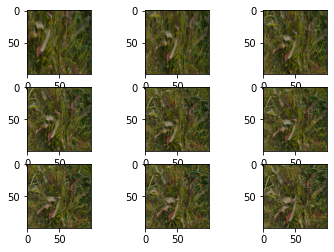

In [23]:
fig, axs = plt.subplots(3,3)
for i, patch in enumerate(extractor):
    resized_patch = cv2.resize(patch, (100,100))
    axs.flatten()[i].imshow(resized_patch)
    if i >= 8: break

In [49]:
weight = 1/len(extractor)
image_matrix = np.zeros((len(extractor),100*100))
mean_image = np.zeros((100,100))
for i, patch in enumerate(tqdm.tqdm(extractor)):
    patch_resized = cv2.resize(cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY), (100,100))
    image_matrix[i, :] = patch_resized.flatten()

100%|██████████| 5655/5655 [19:37<00:00,  4.80it/s]


In [63]:
col_means = image_matrix.mean(axis=0)

In [65]:
image_matrix_rmean = image_matrix - col_means

In [71]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(image_matrix_rmean)

PCA()

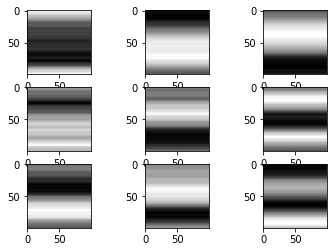

In [88]:
fig, axs = plt.subplots(3,3)
for i in range(9):
    resized_patch = cv2.resize(pca.components_[i, :], (100,100))
    axs.flatten()[i].imshow(resized_patch, cmap='gray')
    if i >= 8: break